#**Relatorio Busca sem Informação x Busca com Informação**

##Um pouco sobre o codigo

Para a realização das buscas, optei por construir uma classe para fazer a estrutura do jogo e as operações básicas do quebra cabeça. Assim, a classe conta com alguns métodos auxiliares, um para iniciar o tabuleiro, que é uma lista de listas, sendo cada lista uma linha no tabuleiro. A função atribui valores de forma aleatória para as posições do tabuleiro, sendo números de 0 a 8, onde o 0 representa a casa vazia. A classe conta ainda com o método de para detectar os possíveis estados de um tabuleiro, fazendo a simulação de movimentos e vendo se estes são válidos de acordo com a regra do jogo. Por fim, um método de verificação de matrizes, usado para comparar um tabuleiro com o objetivo.

In [ ]:
import copy
from random import choice
from time import time
import contextlib
import matplotlib.pyplot as plt


class QuebraCabeca:
    def __init__(self):
        self.tabuleiro = [[] for i in range(0, 3)]
        self.posicao_livre = None
        self.objetivo = [[0, 1, 2], [3, 4, 5], [6, 7, 8]]
        self.tabuleiro_original = None

    def inicia_tabuleiro(self):
        numeros_incluidos = []
        tabuleiro = self.tabuleiro
        for i, linha in enumerate(tabuleiro):
            for j in range(0, 3):
                numero_escolhido = choice([i for i in range(0, 9) if i not in numeros_incluidos])
                linha.append(numero_escolhido)
                numeros_incluidos.append(numero_escolhido)
        self.tabuleiro_original = copy.deepcopy(self.tabuleiro)

    def busca_posicao_livre(self):
        for i, linha in enumerate(self.tabuleiro):
            for j, peca in enumerate(linha):
                if peca == 0:
                    return tuple([i, j])

    def possiveis_estados(self):
        posicao_livre = self.busca_posicao_livre()
        possiveis_vizinhos = [(+1, 0), (-1, 0), (0, +1), (0, -1)]
        vizinhos_disponiveis = []
        for vizinho in possiveis_vizinhos:
            teste = tuple(map(sum, zip(posicao_livre, vizinho)))
            if 0 <= teste[0] <= 2 and 0 <= teste[1] <= 2:
                vizinhos_disponiveis.append(teste)
        estados_disponiveis = []
        for vizinho in vizinhos_disponiveis:
            linha, coluna = vizinho
            tabuleiro_aux = copy.deepcopy(self.tabuleiro)
            tabuleiro_aux[posicao_livre[0]][posicao_livre[1]] = tabuleiro_aux[linha][coluna]
            tabuleiro_aux[linha][coluna] = 0
            estados_disponiveis.append(tabuleiro_aux)
        return estados_disponiveis

    @staticmethod
    def matriz_igual(a, b):
        diferentes = 0
        igual = True
        for i in range(0, 3):
            for j in range(0, 3):
                if a[i][j] != b[i][j]:
                    diferentes += 1
                    igual = False
        if not igual:
            return False, diferentes
        return True, 0

    def busca_em_largura(self):
        print('Busca em largura')
        inicio = time()
        self.tabuleiro = copy.deepcopy(self.tabuleiro_original)
        print(self.tabuleiro)
        visitados = [self.tabuleiro]
        fila = [[self.tabuleiro, []]]
        num_jogadas = 100
        while fila and num_jogadas != 0:
            num_jogadas -= 1
            self.tabuleiro, caminho = fila.pop(0)
            for estado in self.possiveis_estados():
                caminho_aux = copy.deepcopy(caminho)
                if self.matriz_igual(estado, self.objetivo)[0]:
                    print('Achou solucao')
                    print(f'Tempo de execucao: {time() - inicio}')
                    print(f'Numero de estados visitados: {len(visitados)}')
                    caminho_aux.append(self.tabuleiro)
                    caminho_aux.append(estado)
                    print(caminho_aux)
                    return
                if estado not in visitados:
                    visitados.append(estado)
                    caminho_aux.append(self.tabuleiro)
                    fila.append([estado, caminho_aux])
        print('Nao achou solucao')

    def busca_em_profundiade(self):
        print('Busca em profundidade')
        inicio = time()
        self.tabuleiro = copy.deepcopy(self.tabuleiro_original)
        print(self.tabuleiro)
        visitados = [self.tabuleiro]
        pilha = [[self.tabuleiro, []]]
        num_jogadas = 100
        while pilha and num_jogadas != 0:
            num_jogadas -= 1
            self.tabuleiro, caminho = pilha.pop()
            for estado in self.possiveis_estados():
                caminho_aux = copy.deepcopy(caminho)
                if self.matriz_igual(estado, self.objetivo)[0]:
                    print('Achou solucao')
                    print(f'Tempo de execucao: {time() - inicio}')
                    print(f'Numero de estados visitados: {len(visitados)}')
                    caminho_aux.append(self.tabuleiro)
                    caminho_aux.append(estado)
                    print(caminho_aux)
                    return
                if estado not in visitados:
                    visitados.append(estado)
                    caminho_aux.append(self.tabuleiro)
                    pilha.append([estado, caminho_aux])
        print('Nao achou solucao')

    def h1(self, tabuleiro):  # numero de blocos na posicao errada
        score = self.matriz_igual(tabuleiro, self.objetivo)[1]
        return score

    def h2(self, tabuleiro): # soma das distancia das pecas de seu objetivo
        soma = 0
        for i in range(0, 3):
            for j in range(0, 3):
                continua = True
                while continua:
                    for x in range(0, 3):
                        for y in range(0, 3):
                            objetivo = self.objetivo[x][y]
                            if tabuleiro[i][j] == objetivo:
                                distancia_obj = self.calcula_distancia((i, j), (x, y))
                                continua = False
                                if objetivo == 0:
                                    break
                                soma += distancia_obj
                                break
        return soma

    def h3(self, tabuleiro): # maior distancia de uma peca de seu objetivo
        maior_distancia = 0
        for i in range(0, 3):
            for j in range(0, 3):
                continua = True
                while continua:
                    for x in range(0, 3):
                        for y in range(0, 3):
                            objetivo = self.objetivo[x][y]
                            if tabuleiro[i][j] == objetivo:
                                distancia_obj = self.calcula_distancia((i, j), (x, y))
                                continua = False
                                if objetivo == 0:
                                    break
                                if maior_distancia < distancia_obj:
                                    maior_distancia = distancia_obj
                                break
        return maior_distancia

    @staticmethod
    def calcula_distancia(ponto1, ponto2):
        distacia = abs(ponto1[0] - ponto2[0]) + abs(ponto1[1] - ponto2[1])
        return distacia

    def busca_gulosa(self, heuristica):
        print(f'Busca gulosa {heuristica}')
        inicio = time()
        self.tabuleiro = copy.deepcopy(self.tabuleiro_original)
        print(self.tabuleiro)
        fila = [[self.tabuleiro, []]]
        visitados = [self.tabuleiro]
        num_jogadas = 500
        while fila and num_jogadas != 0:
            num_jogadas -= 1
            self.tabuleiro, caminho = fila.pop(0)
            for estado in self.possiveis_estados():
                caminho_aux = copy.deepcopy(caminho)
                if self.matriz_igual(estado, self.objetivo)[0]:
                    print('Achou solucao')
                    print(f'Tempo de execucao: {time() - inicio}')
                    num_visitados = len(visitados)
                    print(f'Numero de estados visitados: {num_visitados}')
                    caminho_aux.append(self.tabuleiro)
                    caminho_aux.append(estado)
                    print(caminho_aux)
                    return True, num_visitados
                if estado not in visitados:
                    visitados.append(estado)
                    caminho_aux.append(self.tabuleiro)
                    fila.append([estado, caminho_aux])
                    if heuristica == 'h1':
                        fila = sorted(fila, key=lambda x: self.h1(x[0]))
                    elif heuristica == 'h2':
                        fila = sorted(fila, key=lambda x: self.h2(x[0]))
                    else:
                        fila = sorted(fila, key=lambda x: self.h3(x[0]))
        print('Nao achou solucao')
        return False, 0


if __name__ == '__main__':
    saida = open('Resultados.txt', 'a')
    h1_visitados = []
    h2_visitados = []
    h3_visitados = []
    jogos = [QuebraCabeca() for i in range(100)]
    for i, jogo in enumerate(jogos):
        print(f'Execucao {i}')
        jogo.inicia_tabuleiro()
        with contextlib.redirect_stdout(saida):
            jogo.busca_em_largura()
            jogo.busca_em_profundiade()
            h1_ret, h1_estados = jogo.busca_gulosa('h1')
            h2_ret, h2_estados = jogo.busca_gulosa('h2')
            h3_ret, h3_estados = jogo.busca_gulosa('h3')
        if h1_ret and h2_ret and h3_ret:
            h1_visitados.append(h1_estados)
            h2_visitados.append(h2_estados)
            h3_visitados.append(h3_estados)
        saida.write('------------------------------------------\n')
    saida.close()
    x = [i for i in range(len(h1_visitados))]
    plt.plot(x, h1_visitados, label="h1")
    plt.plot(x, h2_visitados, label="h2")
    plt.plot(x, h3_visitados, label="h3")
    plt.xlabel('Rodada')
    plt.ylabel('Estados visitados')
    plt.title('Comparacao de heuristica')
    plt.legend()
    plt.show()

##Métodos de busca
Os métodos de busca em largura e profundidade seguem os algoritmos padrões da literatura. Como havia a ocorrência de rodadas onde o tempo de execução extrapolou um limite aceitável, foram limitados a visitação de 100 estados. No caso da busca com informação, o algoritmo utilizado foi a busca gulosa, com três heurísticas. A primeira h1(), considera o número de peças no lugar errado, se comparado com o tabuleiro objetivo; a segunda h2(), a soma das distâncias das peças de seus objetivos; por fim, a terceira (), considera a maior distância de uma peça do seu objetivo. Neste caso, um tabuleiro que, apesar de ter mais peças distantes do seu objetivo, é mais interessante do que um tabuleiro com uma peça muito distante do seu objetivo. Na busca em largura, optei por permitir a visitação de 500 estados, já que nos testes e experiência, sei que ela teria uma chance maior de encontrar soluções de maneira mais eficaz que as buscas cegas.


In [ ]:
def h1(self, tabuleiro):  # numero de blocos na posicao errada
        score = self.matriz_igual(tabuleiro, self.objetivo)[1]
        return score

    def h2(self, tabuleiro): # soma das distancia das pecas de seu objetivo
        soma = 0
        for i in range(0, 3):
            for j in range(0, 3):
                continua = True
                while continua:
                    for x in range(0, 3):
                        for y in range(0, 3):
                            objetivo = self.objetivo[x][y]
                            if tabuleiro[i][j] == objetivo:
                                distancia_obj = self.calcula_distancia((i, j), (x, y))
                                continua = False
                                if objetivo == 0:
                                    break
                                soma += distancia_obj
                                break
        return soma

    def h3(self, tabuleiro): # maior distancia de uma peca de seu objetivo
        maior_distancia = 0
        for i in range(0, 3):
            for j in range(0, 3):
                continua = True
                while continua:
                    for x in range(0, 3):
                        for y in range(0, 3):
                            objetivo = self.objetivo[x][y]
                            if tabuleiro[i][j] == objetivo:
                                distancia_obj = self.calcula_distancia((i, j), (x, y))
                                continua = False
                                if objetivo == 0:
                                    break
                                if maior_distancia < distancia_obj:
                                    maior_distancia = distancia_obj
                                break
        return maior_distancia

##Resultados
 
Seguindo os testes propostos pela atividade, os diferentes algoritmos de buscas foram executados 100 vezes, com diferentes tabuleiros iniciais nessas execuções. Também foi medido o tempo de execução das execuções, nos casos em que um caminho era encontrado e o número de estados visitados para se encontrar a solução. Abaixo, deixo os resultados do teste, que foi usado para as considerações.
 



[Resultados](https://docs.google.com/document/d/1PM8tiyDyqEq-HolUlEeyC_lRTnm3S35TWq3cZtP6COg/edit?usp=sharing)

### Busca em largura
 
A busca em profundidade não alcançou bons resultados, não tendo encontrado nenhuma solução, dentro dos limites estabelecidos. Conclui-se assim que nesse caso, a busca em profundidade não é completa e, consequentemente, não é ótima. Como não há um caso que se encontrou o objetivo, o seu tempo também não foi contabilizado, já que seria irrelevante para o experimento.
 
 
 
### Busca em profundidade
 
Semelhante a busca em largura, a busca em profundidade não conseguiu encontrar solução dentro das 100 execuções. Também podemos concluir que ela não é completa e nem ótima. Seu tempo também não foi contabilizado em nenhuma ocasião
 
### Busca Gulosa
 
 
#### Heurística h1:
 

A busca gulosa encontrou 20 soluções dentro das 100 rodadas, tendo um aproveitamento de 20%. Seu tempo médio de execução para encontrar as soluções foi de 0.30 segundos. Quanto aos estados visitados para encontrar a solução, a média foi de 491.8 estados. Com os resultados, pode-se concluir que nesse experimento, com a heurística h1, a busca gulosa não foi completa, portanto não ótima.
 
#### Heurística h2:
 
No caso da heurística h2, foram encontradas 51 soluções, sendo seu aproveitamento de 51%. Seu tempo de execução teve uma média de 1.00 segundo. A busca visitou uma média de 405.43. Também não garante completude e não é ótima.
 
#### Heurística h3:
 
Com a heurística h3, a busca gulosa conseguiu encontrar 26 soluções, ficando com 26%. O tempo de execução ficou na média de 0.62. A média de estados visitados ficou em 331.35. Como as outras, não é completa nem ótima.
 
### Comparação entre as heurísticas:
 
Analisando os resultados das três heurísticas, é perceptível que a heurística h2 se saiu melhor em eficiência, tendo encontrado mais resultados dentro das 100 rodadas. O seu tempo médio de execução foi maior que as outras, porém quando se olha para o número de estados visitados, ela se sai melhor que h1 e pior que h2, mas com maior número de objetivos encontrados. Em seguida, h3 foi melhor que h1, tendo em vista que encontrou um número maior de objetivos, visitando um menor número de estados, mas com um tempo médio de execução maior. Abaixo, está um gráfico que mostra os estados visitados para encontrar a solução no eixo e o número da roda no eixo x, durante as 100 execuções. Nas ocasiões onde o algoritmo não encontrou solução, o número de estados visitados foi considerado zero.


 
O gráfico não é muito conclusivo, mas dá para perceber que a heurística h2 realmente encontra um número maior de objetivos. Outra coisa que dá para perceber é que quando as três heurísticas encontram resultados na mesma rodada, em geral o número de estados que h1 visita é maior que h2. Também é possível comprovar que, na maioria dos casos, há menos estados para encontrar o objetivo.

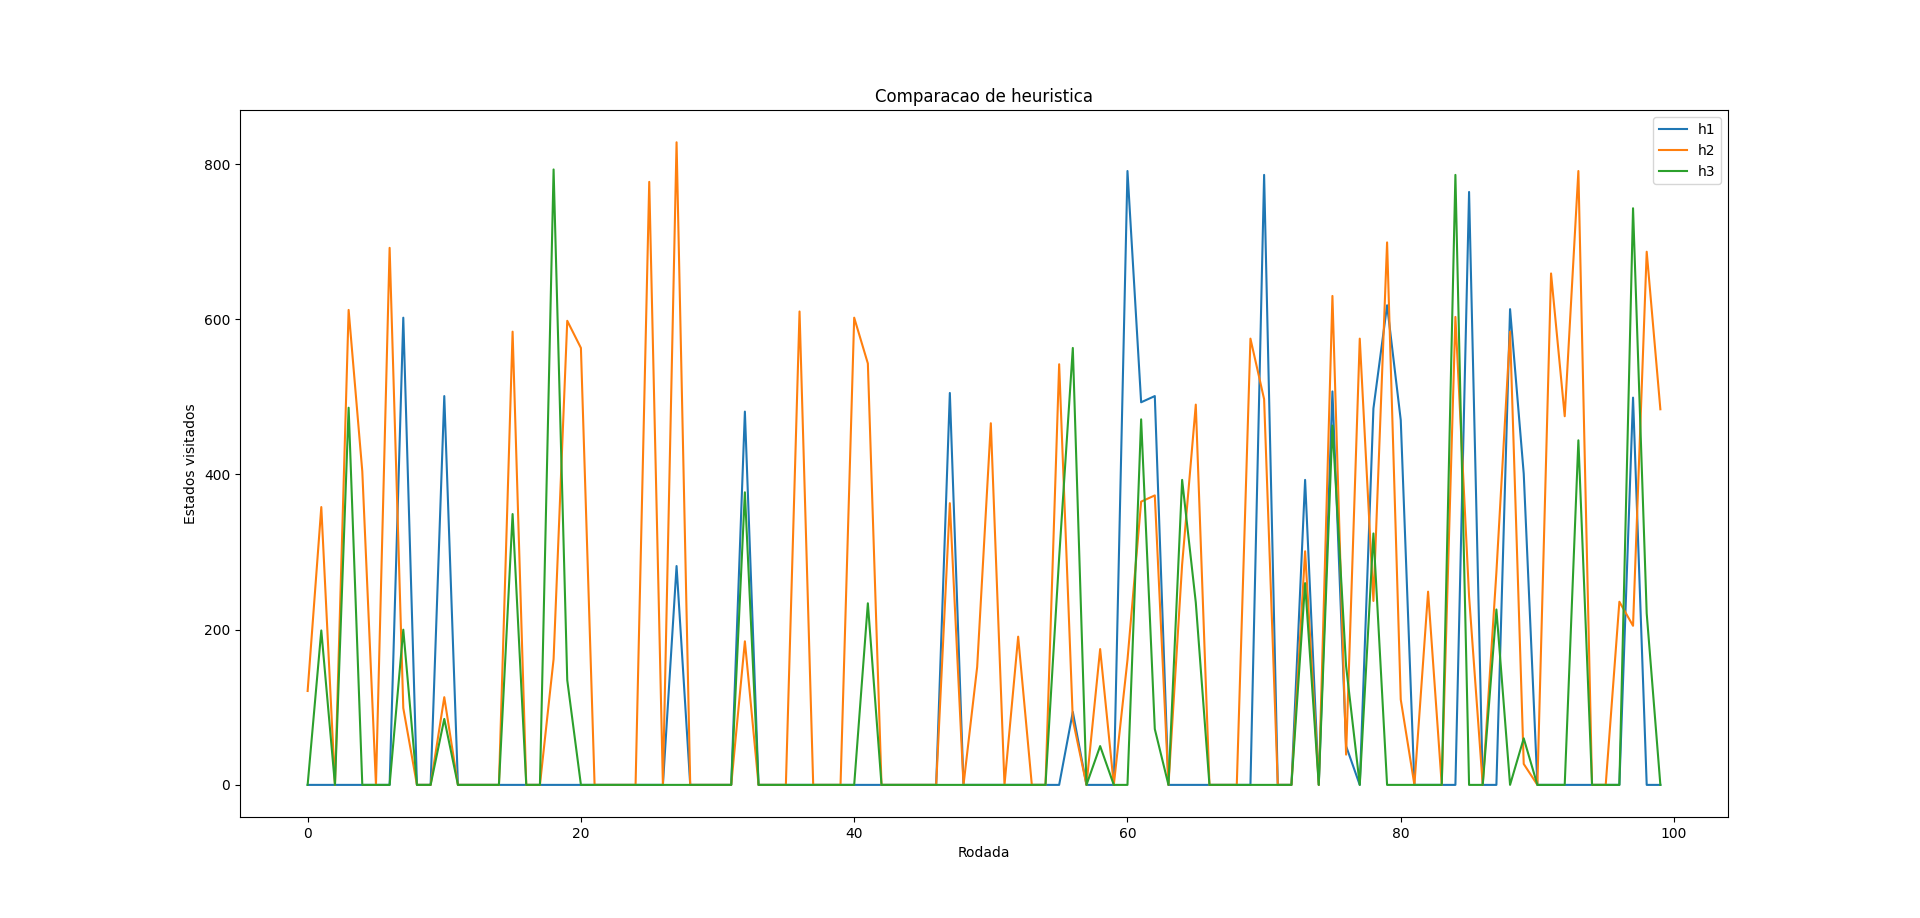


Pensando em uma visualização melhor, em casos onde todos os estados chegaram ao objetivo na mesma rodada, criei outro gráfico que mostra somente esses casos:

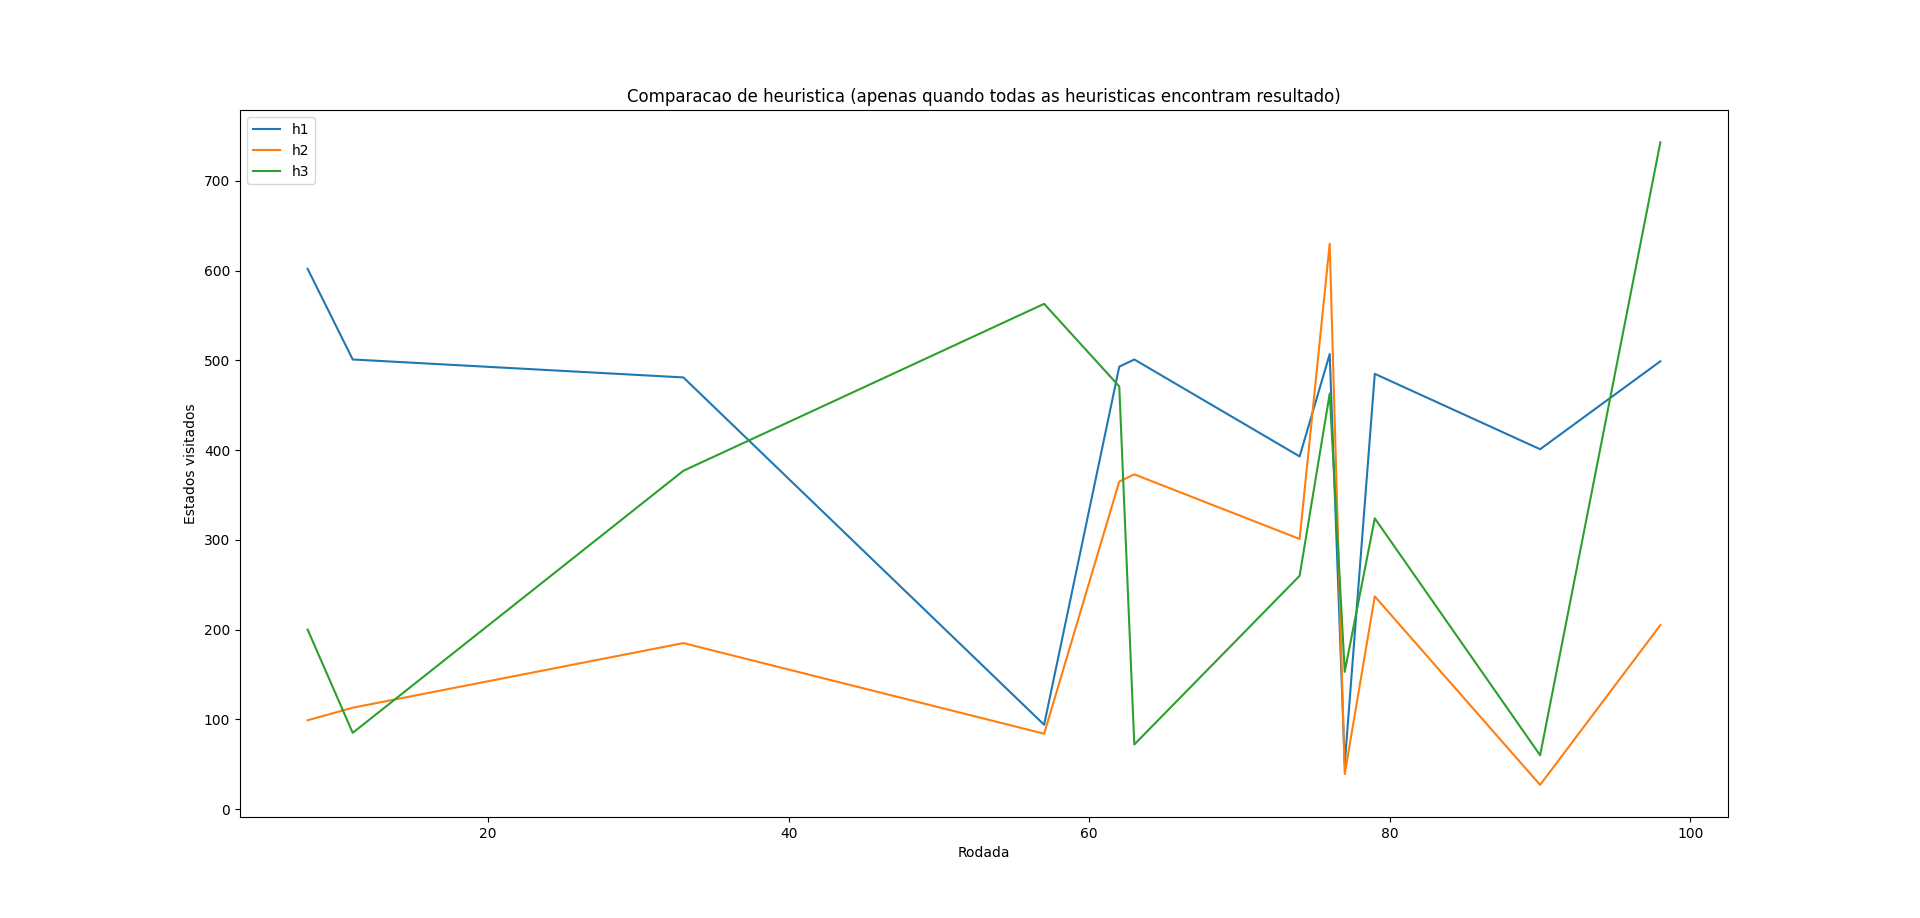

Nele, fica claro que a heurística h2 é mais dominante sobre as outras, visitando um número menor que as outras heurísticas para encontrar o objetivo.
 
 
 
 
 



## Conclusões Finais
 
Com os resultados do experimento, é perceptível que nesse caso, as busca com informação é mais adequada. Ter uma heurística para se guiar auxilia muito o algoritmo a tomar decisões mais inteligentes e a chegar ao objetivo mais rápido com um custo menor de memória e tempo. Também é possível notar como a heurística utilizada para a função de custo faz toda a diferença, e quando bem planejada pode alcançar resultados muito satisfatórios para esse problema do quebra cabeça de 8 peças.
